# Preliminary EDA and visualizations

This section loads the "International Astronaut Database.csv" dataset and produces basic summaries and plots: gender breakdown, top countries by astronaut count, distribution of total flight time (converted to hours), and a scatter of Total Flights vs Total Flight Time.


Dataset shape: (570, 7)

Columns: ['Name', 'Country', 'Gender', 'Flights', 'Total Flights', 'Total Flight Time (ddd:hh:mm)', 'flight_time_hours']

Gender counts:
 Gender
Man      506
Woman     64

Top countries by astronaut count:
 Country
United States     347
Soviet Union       67
Russia             57
Japan              11
China              11
Germany            10
Canada             10
France             10
Italy               7
United Kingdom      3

flight_time_hours stats:
 count      570.000000
mean      2892.874327
std       5683.565401
min          0.016667
25%        303.383333
50%        687.483333
75%       3974.250000
max      47177.466667
Name: flight_time_hours, dtype: float64


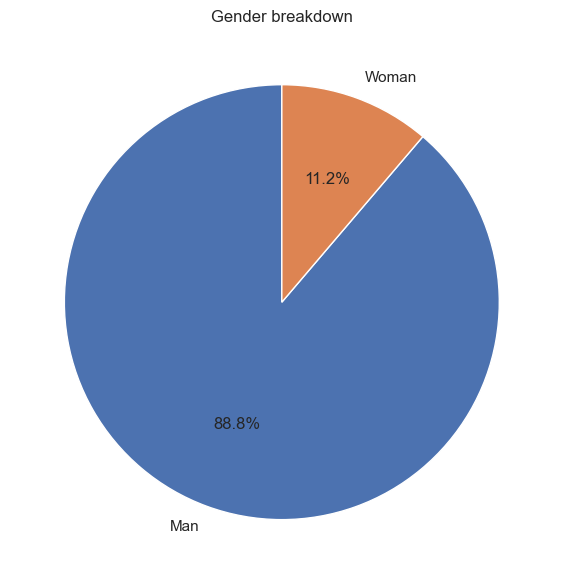

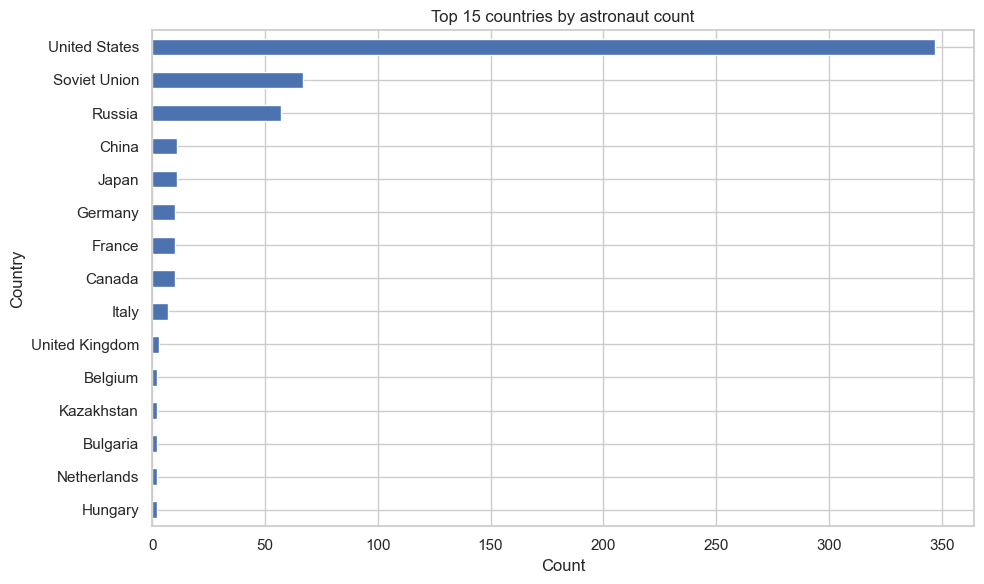

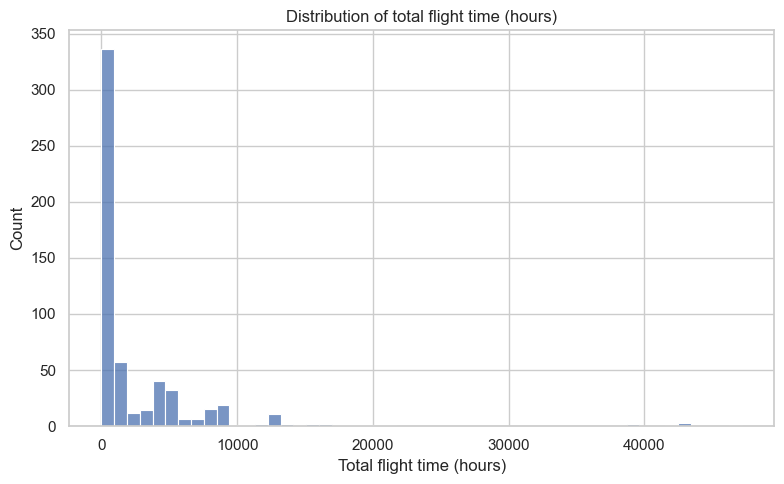

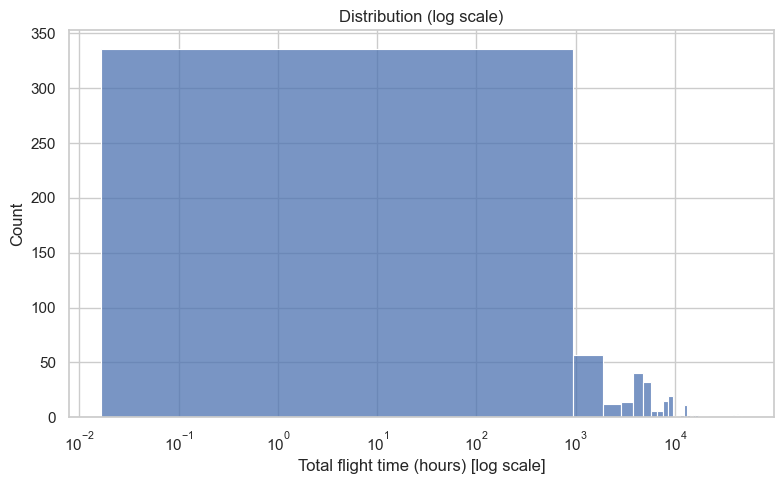

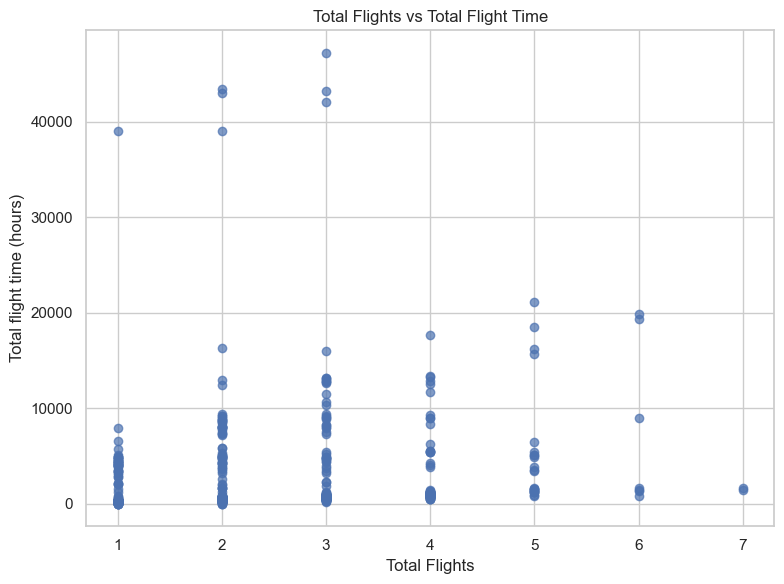

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

# Load data
path = 'dataset/International Astronaut Database.csv'
df = pd.read_csv(path)

# Clean column names
df.columns = [c.strip() for c in df.columns]

# Convert Total Flights to numeric
if 'Total Flights' in df.columns:
    df['Total Flights'] = pd.to_numeric(df['Total Flights'], errors='coerce')

# Parse Total Flight Time (format like ddd:hh:mm) into hours
def parse_dhhmm(s):
    if pd.isna(s):
        return np.nan
    s = str(s).strip().strip('"')
    parts = s.split(':')
    try:
        if len(parts) == 3:
            days = int(parts[0])
            hours = int(parts[1])
            mins = int(parts[2])
            return days * 24 + hours + mins/60.0
    except Exception:
        return np.nan
    return np.nan

col_name = None
for c in df.columns:
    if 'Total Flight Time' in c:
        col_name = c
        break

if col_name is not None:
    df['flight_time_hours'] = df[col_name].apply(parse_dhhmm)
else:
    df['flight_time_hours'] = np.nan

# Quick summaries
print('\nDataset shape:', df.shape)
print('\nColumns:', df.columns.tolist())
print('\nGender counts:\n', df['Gender'].value_counts(dropna=False).to_string())
print('\nTop countries by astronaut count:\n', df['Country'].value_counts().head(10).to_string())
print('\nflight_time_hours stats:\n', df['flight_time_hours'].describe())

# Simple visualizations
plt.figure(figsize=(6,6))
if 'Gender' in df.columns:
    df['Gender'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
    plt.title('Gender breakdown')
    plt.ylabel('')
    plt.tight_layout()

plt.figure(figsize=(10,6))
(df['Country'].value_counts().head(15).sort_values()).plot.barh()
plt.title('Top 15 countries by astronaut count')
plt.xlabel('Count')
plt.tight_layout()

plt.figure(figsize=(8,5))
sns.histplot(df['flight_time_hours'].dropna(), bins=50)
plt.xlabel('Total flight time (hours)')
plt.title('Distribution of total flight time (hours)')
plt.tight_layout()

plt.figure(figsize=(8,5))
sns.histplot(df['flight_time_hours'].dropna(), bins=50)
plt.xscale('log')
plt.xlabel('Total flight time (hours) [log scale]')
plt.title('Distribution (log scale)')
plt.tight_layout()

plt.figure(figsize=(8,6))
plt.scatter(df['Total Flights'].fillna(0), df['flight_time_hours'], alpha=0.7)
plt.xlabel('Total Flights')
plt.ylabel('Total flight time (hours)')
plt.title('Total Flights vs Total Flight Time')
plt.tight_layout()

plt.show()